In [88]:
import scipy.signal as sc
from scipy.io import wavfile
import numpy as np

import params
import helper
import STFT_fast_RLS

import librosa
import librosa.display
from scipy.io import wavfile
from playsound import playsound
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from scipy.fftpack import fft,ifft

In [89]:
#load the data and slpit the channels
original = 'File/alex.wav'
fs, data = wavfile.read(original)            # reading the file

# split the two channels
d1 = wavfile.write('File/alex_1.wav', fs, data[:, 0])  
d2 = wavfile.write('File/alex_2.wav', fs, data[:, 1])

In [91]:
signal_1, fs = librosa.load('File/alex_1.wav',)
signal_2, fs = librosa.load('File/alex_2.wav',)

In [122]:
#par seconde 
n_fft = int(fs/10)
hop_length = int(n_fft /2)
S1 = librosa.stft(signal_1, n_fft=n_fft, hop_length=hop_length)
S2 = librosa.stft(signal_2, n_fft=n_fft, hop_length=hop_length)

In [123]:
X_1 = np.transpose(S1)
X_2 = np.transpose(S2)

# Retrieve useful informations
n_frames = X_1.shape[0]
n_freqs = X_1.shape[1]
dtype = X_1.dtype
L = n_freqs

In [124]:
X_1.shape

(721, 1103)

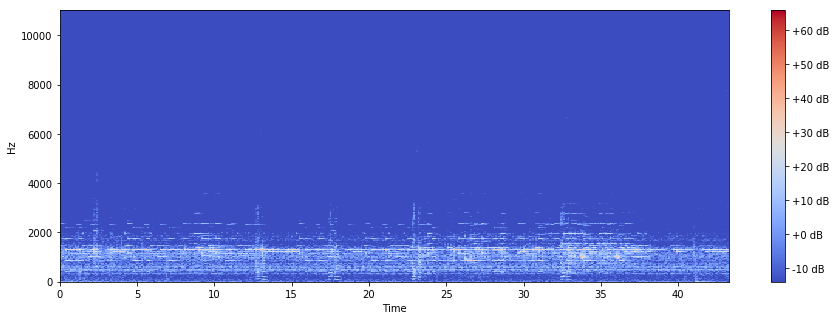

In [43]:
ST = librosa.amplitude_to_db(abs(S1))

plt.figure(figsize=(15, 5))
librosa.display.specshow(ST, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

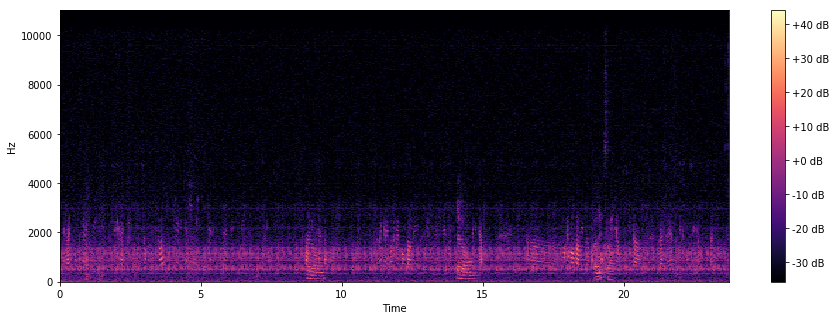

In [174]:
ST = librosa.amplitude_to_db(abs(S1))

plt.figure(figsize=(15, 5))
librosa.display.specshow(ST, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [109]:
S1.shape

(1103, 475)

In [67]:
epsilon.shape

(48, 11026)

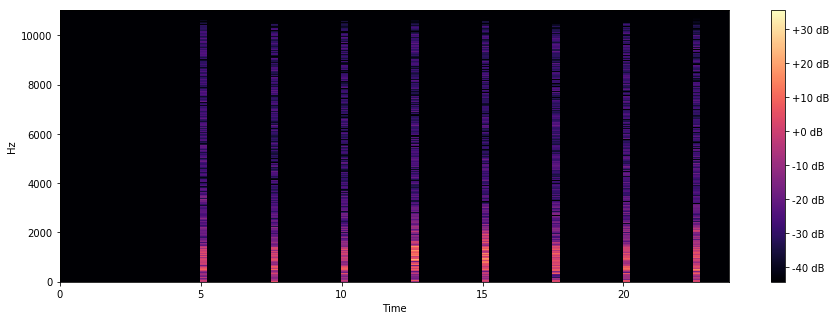

In [105]:
ST = librosa.amplitude_to_db(abs(np.transpose(epsilon)))

plt.figure(figsize=(15, 5))
librosa.display.specshow(ST, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

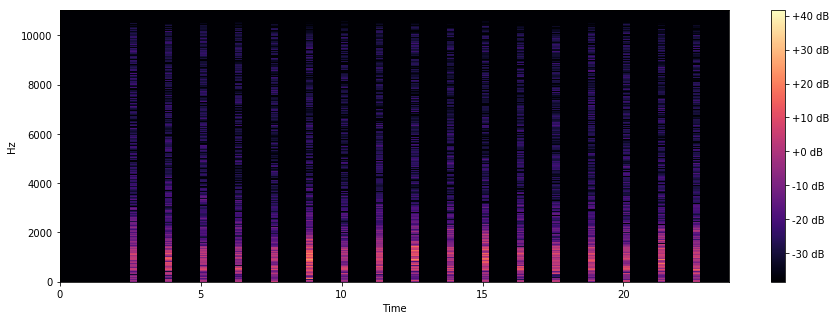

In [94]:
ST = librosa.amplitude_to_db(abs(np.transpose(epsilon)))

plt.figure(figsize=(15, 5))
librosa.display.specshow(ST, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

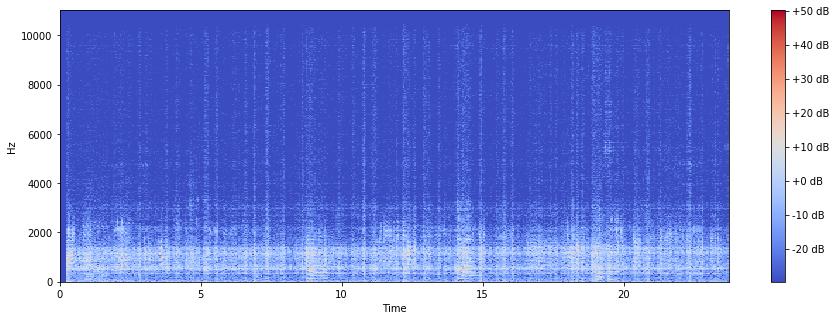

In [173]:
ST = librosa.amplitude_to_db(abs(np.transpose(epsilon)))

plt.figure(figsize=(15, 5))
librosa.display.specshow(ST, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [125]:
d=5
filter_length=params.filter_length
f_factor=params.F_FACTOR
delta=params.DELTA

In [126]:
# Initialize variables
h = np.zeros((L,L))
lh = np.zeros((d+1,L,L), dtype=dtype)
l_h = [h]
#x_2 = np.zeros(filter_length, dtype=dtype)

P = np.eye(L) * (1/delta)

# More initializations
E = np.zeros(X_1.shape, dtype=dtype)
#g = np.zeros((n_frames, filter_length, 1), dtype=dtype)
epsilon = np.zeros(X_1.shape, dtype=dtype)

In [127]:
for m in range(1,n_frames):
            
            print("m = ",m,'/',n_frames)
            #for f in np.arange(n_freqs):
            # print("f = {}".format(f))

            #temp = np.reshape(np.conj(x_2).transpose() @ P[m-1], (1, filter_length))

            # A-priori error
            E[m] = X_1[m] - np.transpose(np.conj(h))@X_2[m]

            # Kalmann gain vector
            num = P@X_2[m]
            denom = f_factor + np.transpose(np.conj(X_2[m]))@P@X_2[m]
            
            g = num/denom
            
            # Update
            P = (P - np.outer(g,np.transpose(np.conj(X_2[m]))@P))*(1/f_factor)
            
            h = h + np.outer(g,np.conj(E[m]))
            indice = int(m%d)
            
            print('indice: ',indice)
            lh[indice] = h
            if m > d:
                ind_buff = int((m+1)%d)
                print('indice buff',ind_buff)
                epsilon[m] = X_1[m] - np.transpose(np.conj(lh[ind_buff]))@X_1[m]
                #epsilon[m] = X_1[m] - np.transpose(np.conjugate(b))@X_2[m]

m =  1 / 721
indice:  1
m =  2 / 721
indice:  2
m =  3 / 721
indice:  3
m =  4 / 721
indice:  4
m =  5 / 721
indice:  0
m =  6 / 721
indice:  1
indice buff 2
m =  7 / 721
indice:  2
indice buff 3
m =  8 / 721
indice:  3
indice buff 4
m =  9 / 721
indice:  4
indice buff 0
m =  10 / 721
indice:  0
indice buff 1
m =  11 / 721
indice:  1
indice buff 2
m =  12 / 721
indice:  2
indice buff 3
m =  13 / 721
indice:  3
indice buff 4
m =  14 / 721
indice:  4
indice buff 0
m =  15 / 721
indice:  0
indice buff 1
m =  16 / 721
indice:  1
indice buff 2
m =  17 / 721
indice:  2
indice buff 3
m =  18 / 721
indice:  3
indice buff 4
m =  19 / 721
indice:  4
indice buff 0
m =  20 / 721
indice:  0
indice buff 1
m =  21 / 721
indice:  1
indice buff 2
m =  22 / 721
indice:  2
indice buff 3
m =  23 / 721
indice:  3
indice buff 4
m =  24 / 721
indice:  4
indice buff 0
m =  25 / 721
indice:  0
indice buff 1
m =  26 / 721
indice:  1
indice buff 2
m =  27 / 721
indice:  2
indice buff 3
m =  28 / 721
indice:  3
i

indice buff 1
m =  211 / 721
indice:  1
indice buff 2
m =  212 / 721
indice:  2
indice buff 3
m =  213 / 721
indice:  3
indice buff 4
m =  214 / 721
indice:  4
indice buff 0
m =  215 / 721
indice:  0
indice buff 1
m =  216 / 721
indice:  1
indice buff 2
m =  217 / 721
indice:  2
indice buff 3
m =  218 / 721
indice:  3
indice buff 4
m =  219 / 721
indice:  4
indice buff 0
m =  220 / 721
indice:  0
indice buff 1
m =  221 / 721
indice:  1
indice buff 2
m =  222 / 721
indice:  2
indice buff 3
m =  223 / 721
indice:  3
indice buff 4
m =  224 / 721
indice:  4
indice buff 0
m =  225 / 721
indice:  0
indice buff 1
m =  226 / 721
indice:  1
indice buff 2
m =  227 / 721
indice:  2
indice buff 3
m =  228 / 721
indice:  3
indice buff 4
m =  229 / 721
indice:  4
indice buff 0
m =  230 / 721
indice:  0
indice buff 1
m =  231 / 721
indice:  1
indice buff 2
m =  232 / 721
indice:  2
indice buff 3
m =  233 / 721
indice:  3
indice buff 4
m =  234 / 721
indice:  4
indice buff 0
m =  235 / 721
indice:  0


indice buff 1
m =  416 / 721
indice:  1
indice buff 2
m =  417 / 721
indice:  2
indice buff 3
m =  418 / 721
indice:  3
indice buff 4
m =  419 / 721
indice:  4
indice buff 0
m =  420 / 721
indice:  0
indice buff 1
m =  421 / 721
indice:  1
indice buff 2
m =  422 / 721
indice:  2
indice buff 3
m =  423 / 721
indice:  3
indice buff 4
m =  424 / 721
indice:  4
indice buff 0
m =  425 / 721
indice:  0
indice buff 1
m =  426 / 721
indice:  1
indice buff 2
m =  427 / 721
indice:  2
indice buff 3
m =  428 / 721
indice:  3
indice buff 4
m =  429 / 721
indice:  4
indice buff 0
m =  430 / 721
indice:  0
indice buff 1
m =  431 / 721
indice:  1
indice buff 2
m =  432 / 721
indice:  2
indice buff 3
m =  433 / 721
indice:  3
indice buff 4
m =  434 / 721
indice:  4
indice buff 0
m =  435 / 721
indice:  0
indice buff 1
m =  436 / 721
indice:  1
indice buff 2
m =  437 / 721
indice:  2
indice buff 3
m =  438 / 721
indice:  3
indice buff 4
m =  439 / 721
indice:  4
indice buff 0
m =  440 / 721
indice:  0


indice buff 2
m =  622 / 721
indice:  2
indice buff 3
m =  623 / 721
indice:  3
indice buff 4
m =  624 / 721
indice:  4
indice buff 0
m =  625 / 721
indice:  0
indice buff 1
m =  626 / 721
indice:  1
indice buff 2
m =  627 / 721
indice:  2
indice buff 3
m =  628 / 721
indice:  3
indice buff 4
m =  629 / 721
indice:  4
indice buff 0
m =  630 / 721
indice:  0
indice buff 1
m =  631 / 721
indice:  1
indice buff 2
m =  632 / 721
indice:  2
indice buff 3
m =  633 / 721
indice:  3
indice buff 4
m =  634 / 721
indice:  4
indice buff 0
m =  635 / 721
indice:  0
indice buff 1
m =  636 / 721
indice:  1
indice buff 2
m =  637 / 721
indice:  2
indice buff 3
m =  638 / 721
indice:  3
indice buff 4
m =  639 / 721
indice:  4
indice buff 0
m =  640 / 721
indice:  0
indice buff 1
m =  641 / 721
indice:  1
indice buff 2
m =  642 / 721
indice:  2
indice buff 3
m =  643 / 721
indice:  3
indice buff 4
m =  644 / 721
indice:  4
indice buff 0
m =  645 / 721
indice:  0
indice buff 1
m =  646 / 721
indice:  1


In [128]:
epsilon.shape

(721, 1103)

In [129]:
S1.shape

(1103, 721)

In [135]:
f = librosa.istft(np.transpose(epsilon),  hop_length=hop_length)

In [136]:
clean = './File/clean_alex_.wav'
librosa.output.write_wav(clean, f, fs)

In [140]:
playsound(clean)

In [139]:
playsound(original)